In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import convolve
from pyonset import Onset
import os
import datetime as dt

In [3]:
start_date = dt.datetime(2023, 5, 9)
end_date = dt.datetime(2023, 5, 11)
spacecraft = "sta"
sensor = "HET"
species = "e"
data_level = "l3"
data_path = f"{os.getcwd()}{os.sep}data"
onset = Onset(start_date, end_date, spacecraft, sensor, species, data_level, data_path)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

sta_l1_het_20230509_v01.cdf:   0%|          | 0.00/215k [00:00<?, ?B/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

sta_l1_het_20230510_v01.cdf:   0%|          | 0.00/215k [00:00<?, ?B/s]

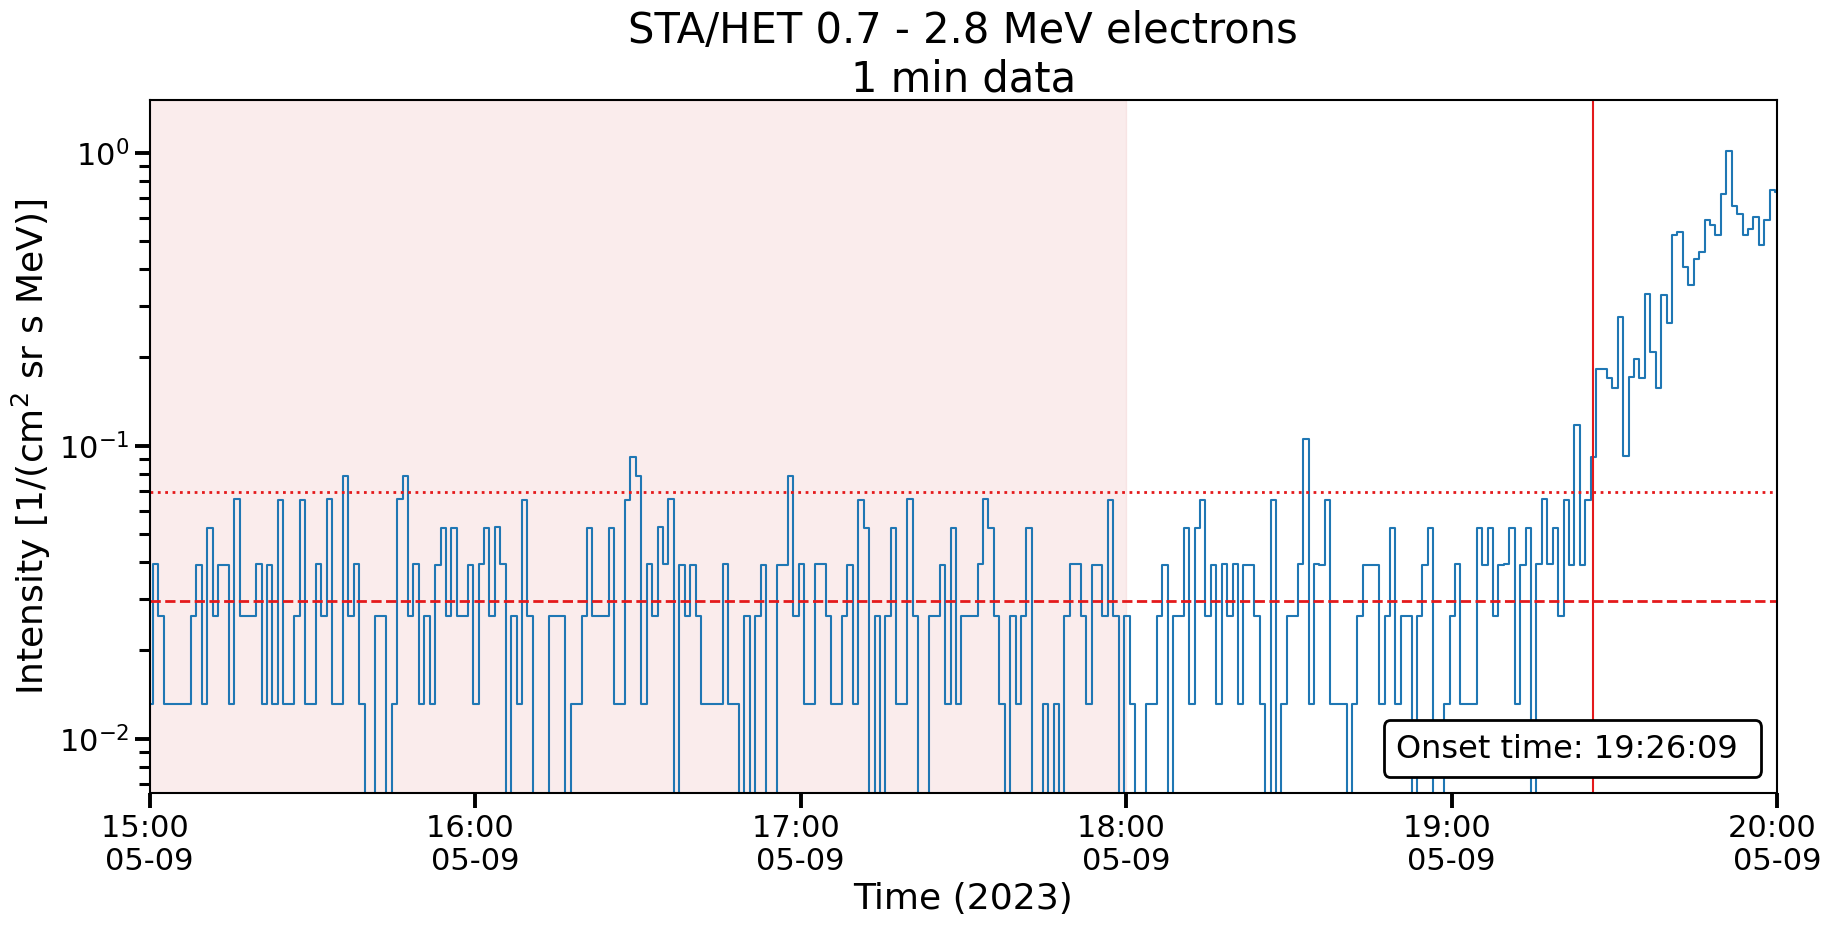

In [74]:
single_onset_stats, flux_series = onset.cusum_onset(channels=[0,1], background_range=(dt.datetime(2023, 5, 9, 12), dt.datetime(2023, 5, 9, 18)), 
                                                    viewing=None, resample="1min", cusum_minutes=60, xlim=["2023-05-09 15:00", "2023-05-09 20:00"],
                                                    plot=True)

In [214]:
from scipy.stats import norm
std = 100
true_onset = pd.to_datetime('2023-05-09 19:15').timestamp()
f = flux_series.values
t = flux_series.index.map(pd.Timestamp.timestamp).values
h = max(f)*np.sqrt(2*np.pi*std**2)*norm.pdf(t, loc=true_onset, scale=std)

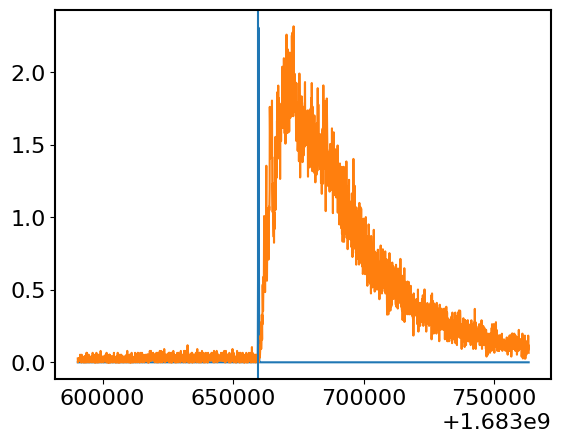

In [215]:
plt.plot(t, h, t, f)
plt.axvline(true_onset)

In [216]:
from scipy.signal import wiener, convolve
from scipy.fft import fft, ifft

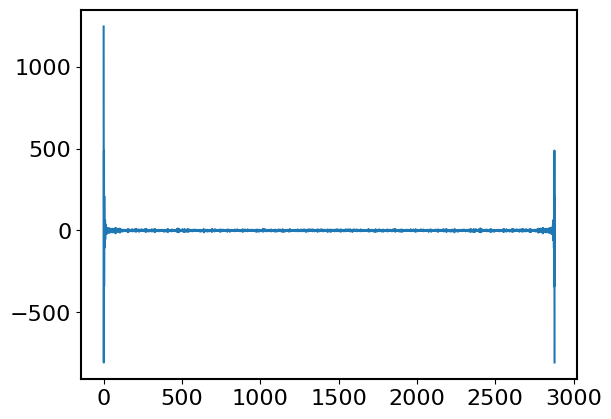

In [228]:
F = fft(f)
plt.plot(F)

In [225]:
h_conv = convolve(f, g)

In [220]:
true_onset

1683659700.0

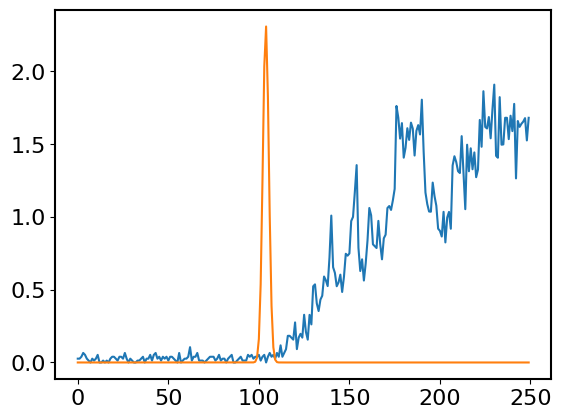

In [221]:
plt.plot(f[1050:1300])
plt.plot(h[1050:1300])

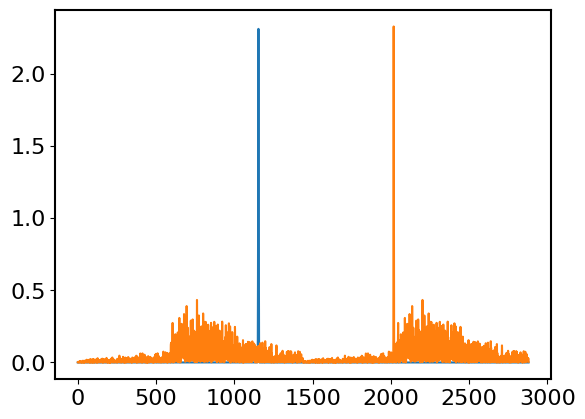

In [227]:
plt.plot(np.arange(0, len(h)), h)
plt.plot(np.linspace(0, len(h), len(h_conv)), np.sqrt(h_conv**2))

In [209]:
h

array([0., 0., 0., ..., 0., 0., 0.], shape=(2880,))